# SinGAN Info  
* Orignal : https://github.com/tamarott/SinGAN
* Now Edit : https://github.com/nowage/SinGAN

* Torch 1.7 : https://github.com/Clefspear99/SinGAN

In [1]:
!pip uninstall -y torch

Found existing installation: torch 1.10.0+cu111
Uninstalling torch-1.10.0+cu111:
  Successfully uninstalled torch-1.10.0+cu111


In [2]:
!pip install torch==1.7.0 torchvision==0.8.0 torchaudio==0.7.0



     |████████████████████████████████| 776.7 MB 4.5 kB/s 
     |████████████████████████████████| 11.8 MB 24.9 MB/s 
     |████████████████████████████████| 7.6 MB 32.2 MB/s 
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.10.0+cu111
    Uninstalling torchaudio-0.10.0+cu111:
      Successfully uninstalled torchaudio-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.0 which is incompatible.


In [3]:
import torch
torch.__version__

'1.7.0'

# Config

In [4]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount) < 1 : drive.mount('/content/drive', force_remount=False)


Mounted at /content/drive


In [5]:
# cp -r /content/drive/MyDrive/imgAugWithSR_prj/ImgAugWithSR/SinGAN /content/
# !rm -rf SinGAN
# !git clone https://github.com/nowage/SinGAN
#!git clone https://github.com/Clefspear99/SinGAN

In [8]:

%cd /content/drive/MyDrive/202111_ObjectDection_Kitri/Day2_SourceCode/SinGanTest
!git clone https://github.com/nowage/SinGAN
!ls /content/drive/MyDrive/202111_ObjectDection_Kitri/Day2_SourceCode/SinGanTest

/content/drive/MyDrive/202111_ObjectDection_Kitri/Day2_SourceCode/SinGanTest
Cloning into 'SinGAN'...
remote: Enumerating objects: 842, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 842 (delta 13), reused 13 (delta 4), pack-reused 810
Receiving objects: 100% (842/842), 96.99 MiB | 22.40 MiB/s, done.
Resolving deltas: 100% (332/332), done.
Checking out files: 100% (59/59), done.
SinGAN


In [9]:
basePath="/content/drive/MyDrive/202111_ObjectDection_Kitri/Day2_SourceCode/SinGanTest/SinGAN"
!ls {basePath}

animation.py  harmonization.py	paint2image.py	   SIFID.npy
config.py     imgs		random_samples.py  SinGAN
config.pyc    Input		README.md	   SinGAN.ipynb
Downloads     LICENSE.txt	requirements.txt   SR.py
editing.py    main_train.py	SIFID


In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/z_backup
!ls "/content/drive/MyDrive/Colab Notebooks/z_backup"

# Implementation

In [ ]:
!pip uninstall -y imgaug

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Successfully uninstalled imgaug-0.2.9


In [10]:
!cd {basePath};python -m pip install -r requirements.txt


#train


In [16]:
ii=33333 # python

In [17]:
%%script env i={ii}  bash 
echo $i


33333


In [ ]:
%%script env basePath={basePath}  bash 
rm -rf $basePath/TrainedModels/*
cd $basePath;python main_train.py --input_name birds.png



# Random samples


In [ ]:
%%script env basePath={basePath}  bash 

cd $basePath
python random_samples.py --input_name birds.png --mode random_samples --gen_start_scale 0




Random Seed:  1219
random samples for image birds.png, start scale=1, already exist


# Random samples of arbitrary sizes


In [ ]:
%%script env basePath={basePath}  bash 
cd $basePath
rm -rf Output/*;python random_samples.py --input_name birds.png --mode random_samples_arbitrary_sizes --scale_h 2 --scale_v 2



Random Seed:  8631
random samples for image birds.png at size: scale_h=2.000000, scale_v=2.000000, already exist


# Animation from a single image


In [ ]:
%%script env basePath={basePath}  bash 
cd $basePath
python animation.py --input_name birds.png



Random Seed:  6742
GeneratorConcatSkip2CleanAdd(
  (head): ConvBlock(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (body): Sequential(
    (block1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block2): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (LeakyRelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (block3): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

# Harmonization

In [ ]:
%%bash
cd $basePath
python harmonization.py --input_name birds.png --ref_name <naively_pasted_reference_image_file_name> --harmonization_start_scale <scale to inject>



# Editing


In [ ]:
%%bash
cd $basePath
python editing.py --input_name <training_image_file_name> --ref_name <edited_image_file_name> --editing_start_scale <scale to inject>



# Paint to Image


In [ ]:
%%bash
cd $basePath
python paint2image.py --input_name <training_image_file_name> --ref_name <paint_image_file_name> --paint_start_scale <scale to inject>




# Single Image Fréchet Inception Distance 


In [ ]:
%%bash
cd $basePath
python SIFID/sifid_score.py --path2real <real images path> --path2fake <fake images path> 


# SR

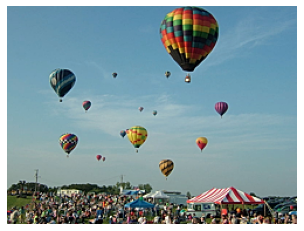

In [ ]:
from matplotlib.pyplot import imread,imshow,subplots,axis
from os.path import join
ir=imread(basePath+'Input/Images/balloons.png')
axis("Off")
imshow(ir)




In [ ]:
# import os
# os.environ['basePath'] = basePath
# !rm -rf /content/SinGAN/TrainedModels/*

In [ ]:
%%script env basePath={basePath}  bash 
# python  {basePath}/main_train.py --input_name  {basePath}/Input/Images/balloons.png
# cd {basePath};python random_samples.py --input_name <training_image_file_name> --mode random_samples --gen_start_scale <generation start scale number>
cd $basePath
echo python  $basePath/main_train.py --input_name $basePath/Input/Images/balloons.png

# python  $basePath/SR.py --input_name birds.png --not_cuda
python  $basePath/SR.py  --input_name balloons.png  --sr_factor 4

python /content/drive/MyDrive/imgAugWithSR_prj/ImgAugWithSR/SinGAN/main_train.py --input_name /content/drive/MyDrive/imgAugWithSR_prj/ImgAugWithSR/SinGAN/Input/Images/balloons.png
Random Seed:  8124


Traceback (most recent call last):
  File "/content/drive/MyDrive/imgAugWithSR_prj/ImgAugWithSR/SinGAN/SR.py", line 38, in <module>
    Gs, Zs, reals, NoiseAmp = functions.load_trained_pyramid(opt)
  File "/content/drive/MyDrive/imgAugWithSR_prj/ImgAugWithSR/SinGAN/SinGAN/functions.py", line 238, in load_trained_pyramid
    Gs = torch.load('%s/Gs.pth' % dir)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 594, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 230, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 211, in __init__
    super(_open_file, self).__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: 'TrainedModels/balloons/scale_factor=0.793701,alpha=100/Gs.pth'


# Command Option

In [ ]:
# !python  {basePath}/main_train.py  --help
!python  $basePath/SR.py  --help

usage: SR.py [-h] [--not_cuda] [--netG NETG] [--netD NETD]
             [--manualSeed MANUALSEED] [--nc_z NC_Z] [--nc_im NC_IM]
             [--out OUT] [--nfc NFC] [--min_nfc MIN_NFC] [--ker_size KER_SIZE]
             [--num_layer NUM_LAYER] [--stride STRIDE] [--padd_size PADD_SIZE]
             [--scale_factor SCALE_FACTOR] [--noise_amp NOISE_AMP]
             [--min_size MIN_SIZE] [--max_size MAX_SIZE] [--niter NITER]
             [--gamma GAMMA] [--lr_g LR_G] [--lr_d LR_D] [--beta1 BETA1]
             [--steps STEPS] [--lambda_grad LAMBDA_GRAD] [--alpha ALPHA]
             [--input_dir INPUT_DIR] [--input_name INPUT_NAME]
             [--sr_factor SR_FACTOR] [--mode MODE]

optional arguments:
  -h, --help            show this help message and exit
  --not_cuda            disables cuda
  --netG NETG           path to netG (to continue training)
  --netD NETD           path to netD (to continue training)
  --manualSeed MANUALSEED
                        manual seed
  --nc_z NC_Z    

In [ ]:
from matplotlib.pyplot import imread,imshow,subplots,axis

def imshow2(img1Path,img2Path,shareAxis=True):
  fig, ax = subplots(nrows=1, ncols=2, figsize=(20,13), dpi=80, sharex=shareAxis, sharey=shareAxis)

  img = imread(img1Path)
  ax[0].axis("on")
  ax[0].imshow(img, cmap='gray')



  img2 = imread(  img2Path)
  ax[1].axis("on")
  ax[1].imshow(img2, cmap='gray')


In [ ]:

imgRealPath=basePath+'/Input/Images/birds.png'
imgFakePath=basePath+'/Output/SR/4/birds_HR.png'
# imshow2(imgRealPath,imgFakePath)

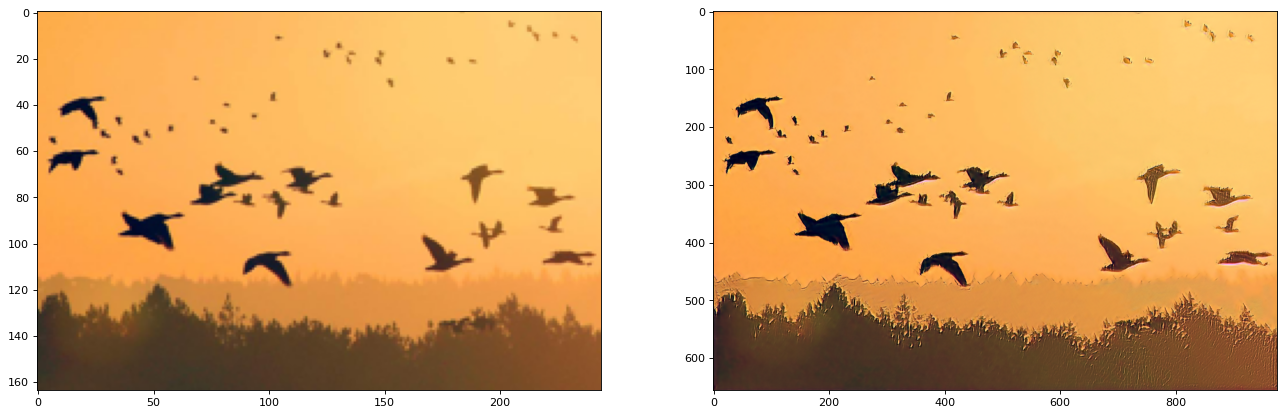

In [ ]:
imshow2(imgRealPath,imgFakePath,False)

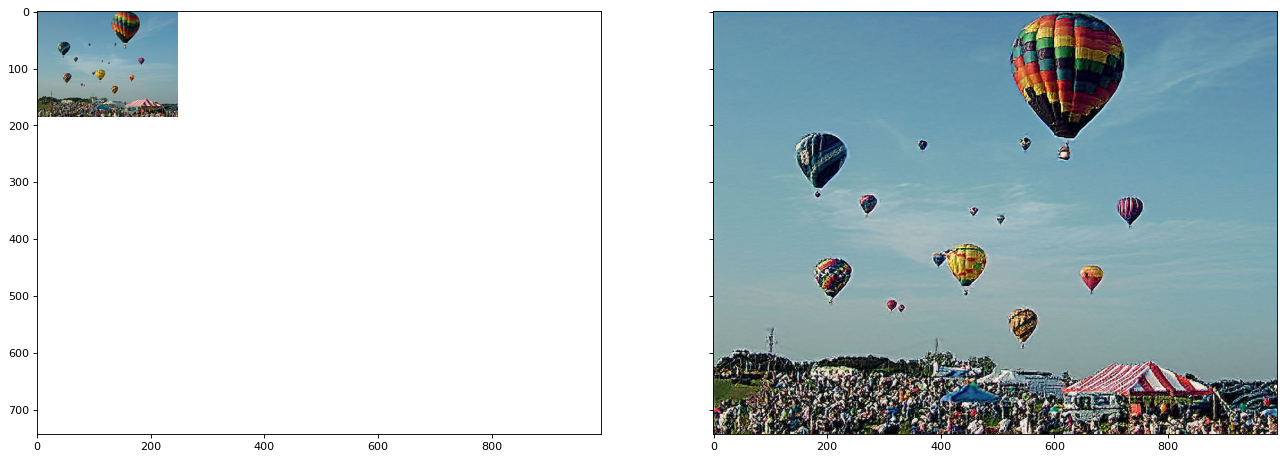

In [ ]:

imgRealPath='/content/SinGAN/Input/Images/balloons.png'
imgFakePath='/content/SinGAN/Output/SR/4.0/balloons_HR.png'
imshow2(imgRealPath,imgFakePath)


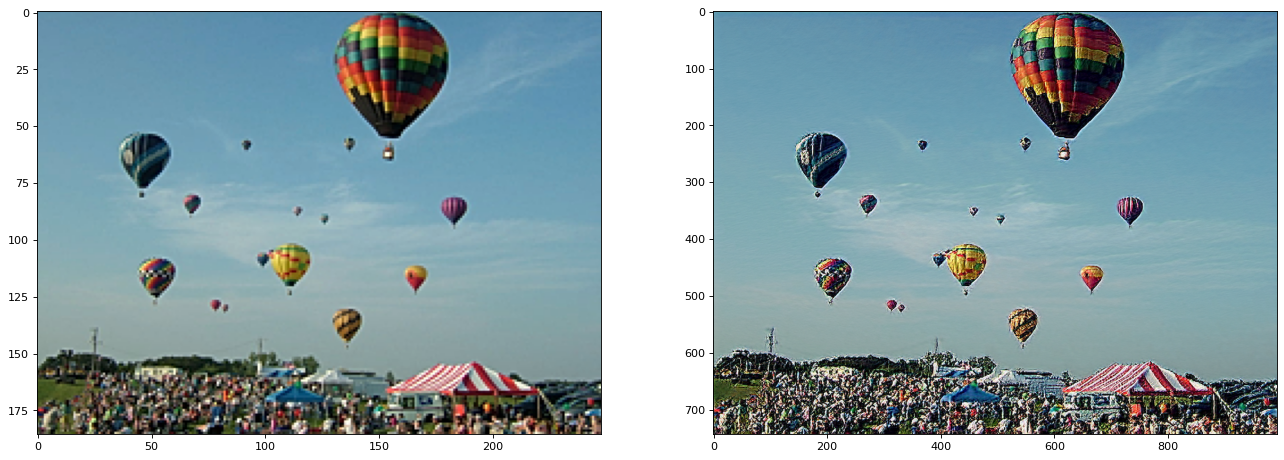

In [ ]:
imshow2(imgRealPath,imgFakePath,False)